# Data for predicting heart Failure

These are the attributes listed in the column order of the data set.

1: Age: age of the patient [years]

2: Sex: sex of the patient [M: Male, F: Female]

3: ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: ymptomatic]

4: RestingBP: resting blood pressure [mm Hg]

5: Cholesterol: serum cholesterol [mm/dl]

6: FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7: RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8: MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9: ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10: Oldpeak: oldpeak = ST [Numeric value measured in depression]

11: ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12: HeartDisease: output class [1: heart disease, 0: Normal]

Data main source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

I downloaded from kaggle: https://www.kaggle.com/fedesoriano/heart-failure-prediction

# Importing libraries and Data

In [1]:
# Importing necessary Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Dealing with Categorical Variables

In [6]:
# Sex column is converted to 1 for M (male) and 0 for f (female)

In [7]:
df['Sex'] = df['Sex'].map({'M':1, 'F':0})   

In [8]:
# ChestPainType column is converted to 0-->(TA: Typical Angina), 1-->(ATA: Atypical Angina)
# 2-->(NAP: Non-Anginal Pain), 3-->(ASY: ymptomatic)

In [9]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [10]:
df['ChestPainType'] = df['ChestPainType'].map({"ATA":0, "NAP":1, "ASY":2, "TA":3})

In [11]:
#RestingECG column is converted to 
#0: normal, 
#1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [12]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [13]:
df['RestingECG'] = df['RestingECG'].map({'Normal':0, 'ST':1, 'LVH':2})

In [14]:
#ExerciseAngina columns is converted to: 1 = yes; 0 = no

In [15]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0, 'Y':1})

In [17]:
#ST_Slope: 0:Up, 1:Flat, 2:down

In [18]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [19]:
df['ST_Slope'] = df['ST_Slope'].map({'Up':0, 'Flat':1, 'Down':2})

In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,1.452070,0.851832,0.0,1.00,2.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


# Explanatory Data Analysis & Outliers

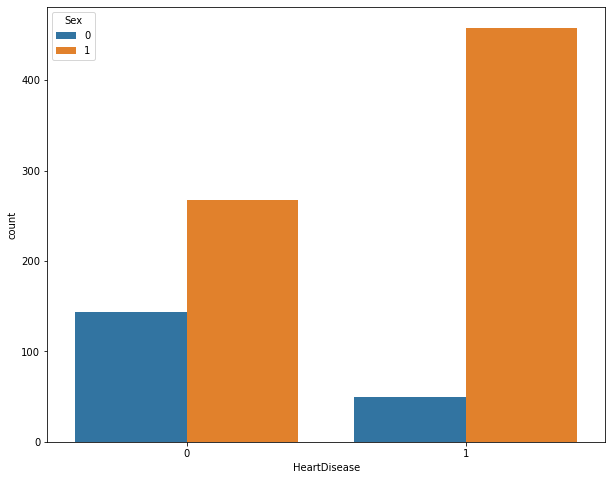

In [23]:
# Analyzing target data
plt.figure(figsize=(10,8))
sns.countplot(x='HeartDisease', hue='Sex', data =df);

In [24]:
df['Sex'].value_counts()   #sex column is imbalanced. There are more males than females

1    725
0    193
Name: Sex, dtype: int64

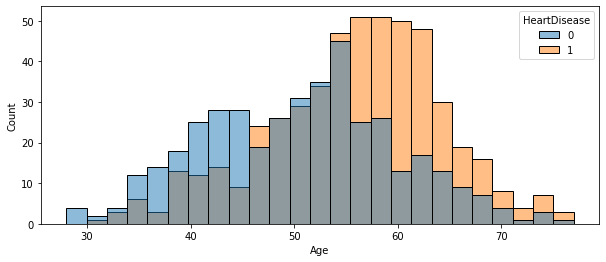

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', bins=25,hue='HeartDisease');

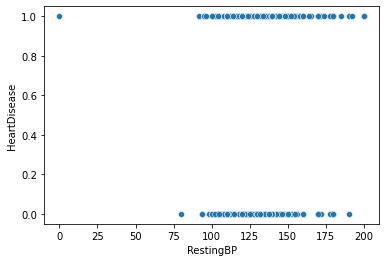

In [26]:
sns.scatterplot(x='RestingBP', y='HeartDisease', data=df);

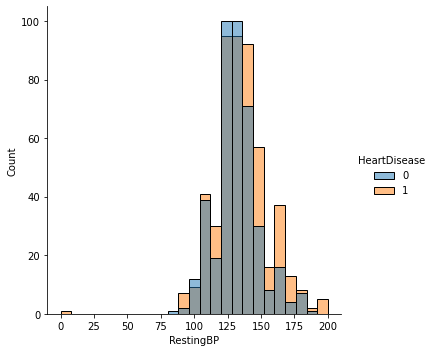

In [27]:
sns.displot(x='RestingBP', data=df, hue='HeartDisease', bins=25);

In [28]:
#It looks there is one Outlier which should be removed.! Let to drop it

In [29]:
df = df[df['RestingBP']>25]

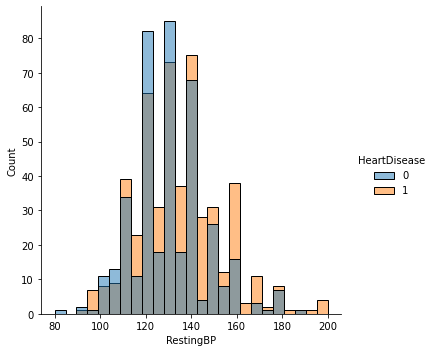

In [30]:
sns.displot(x='RestingBP', data=df, hue='HeartDisease', bins=25);

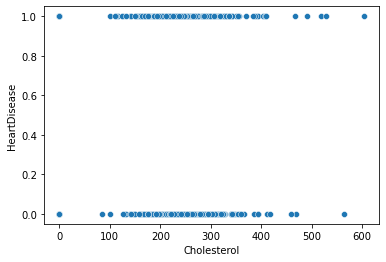

In [31]:
sns.scatterplot(x='Cholesterol', y='HeartDisease', data=df);

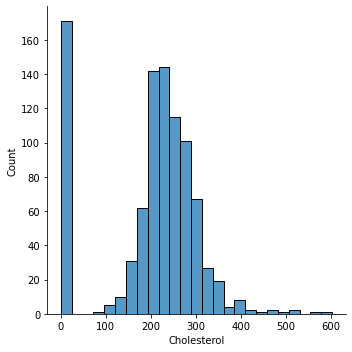

In [32]:
sns.displot(x='Cholesterol', data=df, bins=25);

In [33]:
# Outliers related to Cholesterol are removed
df = df[(df['Cholesterol']>80) & (df['Cholesterol']<430)]

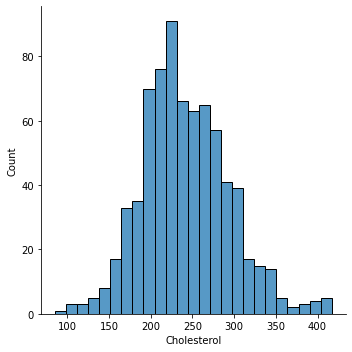

In [34]:
sns.displot(x='Cholesterol', data=df, bins=25);

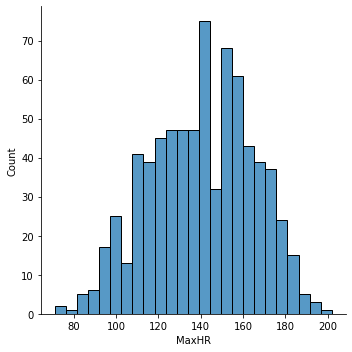

In [35]:
sns.displot(x='MaxHR', data=df, bins=25);

<AxesSubplot:xlabel='MaxHR'>

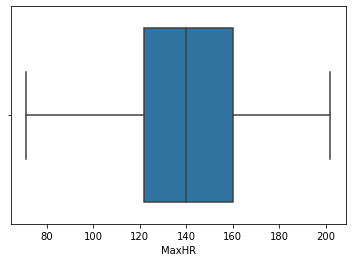

In [36]:
sns.boxplot(x=df['MaxHR'])

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,0,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


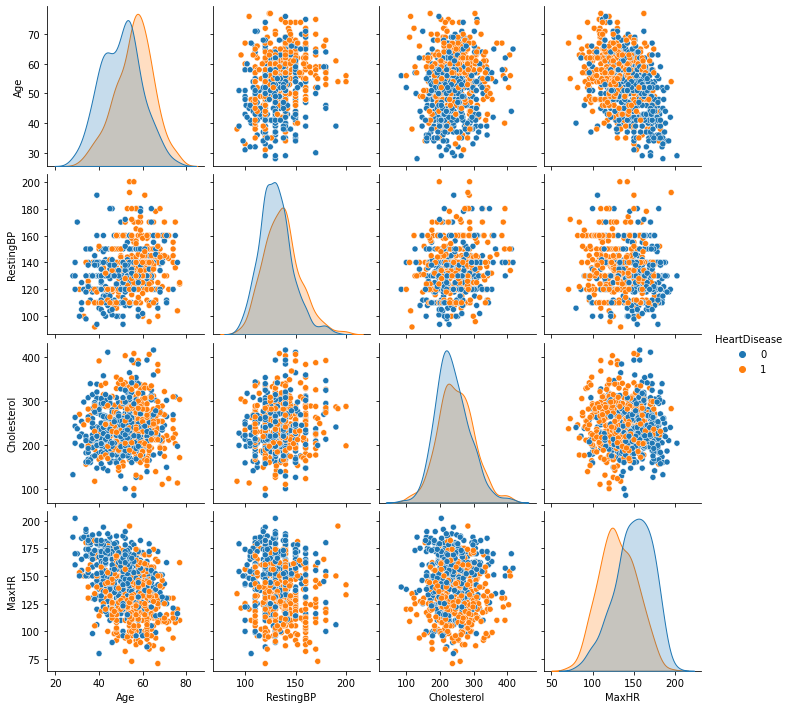

In [38]:
# Analyzing target data
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue='HeartDisease');

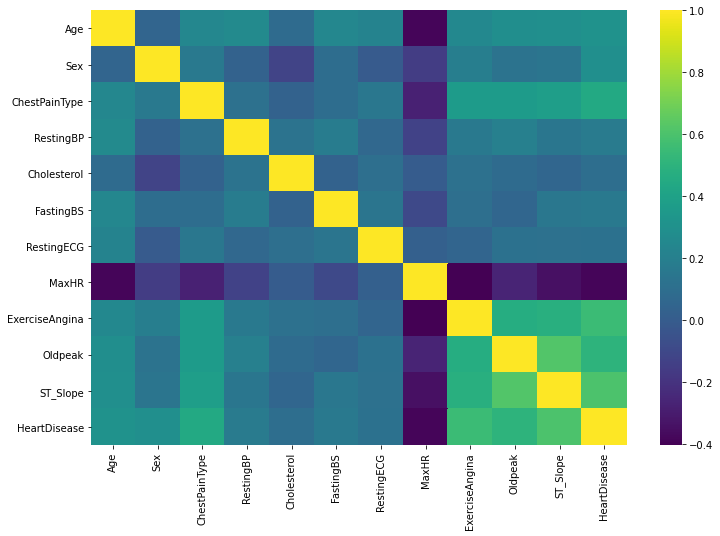

In [39]:
#correlation between all data 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis');

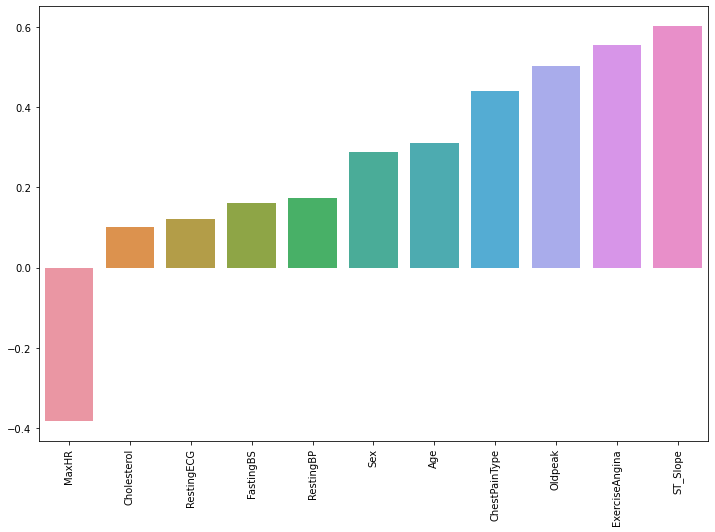

In [40]:
# correlation with target variable 
df_corr = df.corr()['HeartDisease'].sort_values()[:-1]

plt.figure(figsize=(12,8))
sns.barplot(x=df_corr.index, y=df_corr.values)
plt.xticks(rotation=90);

# Preparing X and y

In [41]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
len(df) * 0.1

73.8

In [44]:
X_train0, X_hold, y_train0, y_hold = train_test_split(X, y, test_size=0.10, random_state=101)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train0, y_train0, test_size=0.10, random_state=101)

In [46]:
scaler = StandardScaler()

In [47]:
scaled_X_train = scaler.fit_transform(X_train)

In [48]:
scaled_X_test = scaler.transform(X_test)

In [49]:
scaled_X_hold = scaler.transform(X_hold)

# Model Selection and Training

In [50]:
# We will try few different model for this classification task.! to select a base model to do hyperparameter tuning.
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
lr = LogisticRegression()
svc = SVC()
gdc = GradientBoostingClassifier()

In [52]:
def model_func(model):
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_test)
    print(classification_report(y_test, y_pred))
    print('\n')
    plot_confusion_matrix(model, scaled_X_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.76      0.76      0.76        25

    accuracy                           0.82        67
   macro avg       0.81      0.81      0.81        67
weighted avg       0.82      0.82      0.82        67





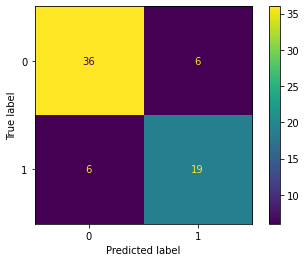

In [53]:
model_func(lr)

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        42
           1       0.70      0.84      0.76        25

    accuracy                           0.81        67
   macro avg       0.80      0.81      0.80        67
weighted avg       0.82      0.81      0.81        67





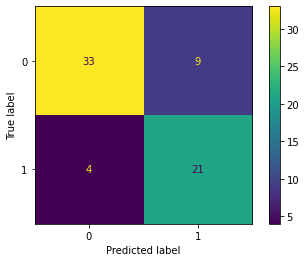

In [54]:
model_func(svc)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.75      0.84      0.79        25

    accuracy                           0.84        67
   macro avg       0.82      0.84      0.83        67
weighted avg       0.84      0.84      0.84        67





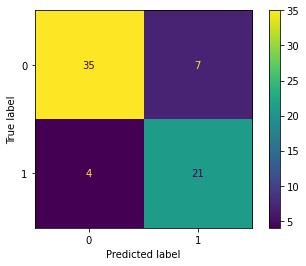

In [55]:
model_func(gdc)

In [56]:
# We select GradientBoostingClassifier() for hyperparameters tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
model = GradientBoostingClassifier()

In [59]:
param_grid = {'learning_rate':[0.02, 0.1, 0.4, 0.7, 1],
             'n_estimators':[40, 80, 100, 120, 150]}

In [60]:
grid_model = GridSearchCV(model, param_grid)

In [61]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.02, 0.1, 0.4, 0.7, 1],
                         'n_estimators': [40, 80, 100, 120, 150]})

In [62]:
grid_model.best_params_

{'learning_rate': 0.4, 'n_estimators': 80}

In [63]:
y_pred = grid_model.predict(scaled_X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.77      0.80      0.78        25

    accuracy                           0.84        67
   macro avg       0.82      0.83      0.83        67
weighted avg       0.84      0.84      0.84        67



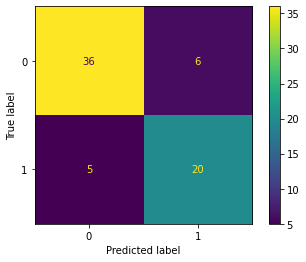

In [65]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [66]:
# Not much different from base model without hyperparameter tuning!

# Model Deployment

In [67]:
# Here hold on data will be used.!

In [68]:
best_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80)

In [69]:
scaler_1 = StandardScaler()
scaled_X_train0 = scaler_1.fit_transform(X_train0)
scled_X_hold = scaler_1.transform(X_hold)

In [70]:
best_model.fit(scaled_X_train0, y_train0)

GradientBoostingClassifier(n_estimators=80)

In [71]:
y_pred = best_model.predict(scaled_X_hold)

In [72]:
print(classification_report(y_hold, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.88      0.95      0.91        39

    accuracy                           0.91        74
   macro avg       0.91      0.90      0.90        74
weighted avg       0.91      0.91      0.91        74



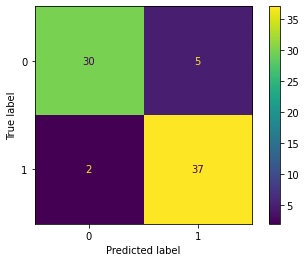

In [74]:
plot_confusion_matrix(best_model, scaled_X_hold, y_hold)